##  Material for the course "Numerical Simulation of reactive flows"  
Author: Jun.-Prof. Federica Ferraro \
Technische Universität Braunschweig \
Institut für Flugantriebe und Strömungsmaschinen (IFAS)

Date: 07.12.2023

### Exercise 4 - Calculation of the laminar flame speed 
Documentation:\
https://cantera.org/dev/python/thermo.html

source: https://cantera.org/examples/jupyter/flames/flame_speed_with_sensitivity_analysis.ipynb.html
https://cantera.org/examples/python/onedim/adiabatic_flame.py.html

In [13]:
import cantera as ct
import numpy as np
#import pandas as pd

In [14]:
# Import plotting modules and define plotting preference
%config InlineBackend.figure_formats = ["svg"]
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 120

# Get the best of both ggplot and seaborn
#plt.style.use("ggplot")
#plt.style.use("seaborn-deep")

#plt.rcParams["figure.autolayout"] = True

In [15]:
# Inlet Temperature in Kelvin and Inlet Pressure in Pascals
# In this case we are setting the inlet T and P to room temperature conditions
Tin = 300
p = 101325

# Domain width in metres
width = 0.03

# Define the gas-mixutre and kinetics
gas = ct.Solution("h2o2.yaml")

# Create a stoichiometric H2/Air premixed mixture
gas.set_equivalence_ratio(1.0, "H2", {"O2": 1.0, "N2": 3.76})
gas.TP = Tin, p

In [16]:
# Create the flame object
flame = ct.FreeFlame(gas, width=width)

# Define tolerances for the solver
flame.set_refine_criteria(ratio=3, slope=0.06, curve=0.11)

# Define logging level
loglevel = 1 # amount of diagnostic output

#flame.show()

In [17]:
# Solve with mixture averaged transort model 
flame.transport_model='mixture-averaged'
flame.solve(loglevel=loglevel, auto=True)
Su0 = flame.velocity[0]
print(f"Mixture-averaged flamespeed is: {Su0 :.2f} m/s")
output= "adiabatic_flame.yaml"
#flame.save(output,description='mixture-averaged')



************ Solving on 8 point grid with energy equation enabled ************

..............................................................................

Attempt Newton solution of steady-state problem.
Newton steady-state solve failed.

Attempt 10 timesteps.
Final timestep info: dt= 4.746e-06  log(ss)= 7.226     

Attempt Newton solution of steady-state problem.
Newton steady-state solve succeeded.

Problem solved on [9] point grid(s).

..............................................................................
grid refinement disabled.

******************** Solving with grid refinement enabled ********************

..............................................................................

Attempt Newton solution of steady-state problem.
Newton steady-state solve succeeded.

Problem solved on [9] point grid(s).

..............................................................................
##############################################################################
Re

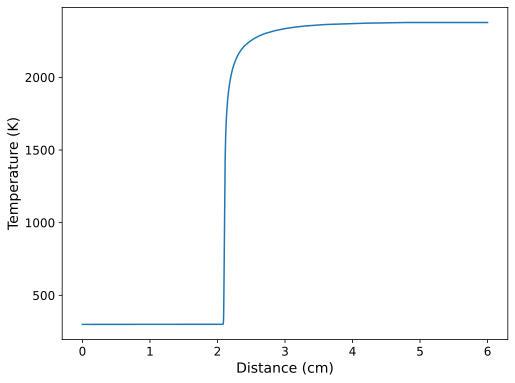

In [18]:
#flame.show()
plt.figure()

plt.plot(flame.grid * 100, flame.T, "-")
plt.xlabel("Distance (cm)")
plt.ylabel("Temperature (K)");

In [164]:
#for i, specie in enumerate(gas.species()):
#    print(f"{i}. {specie}")

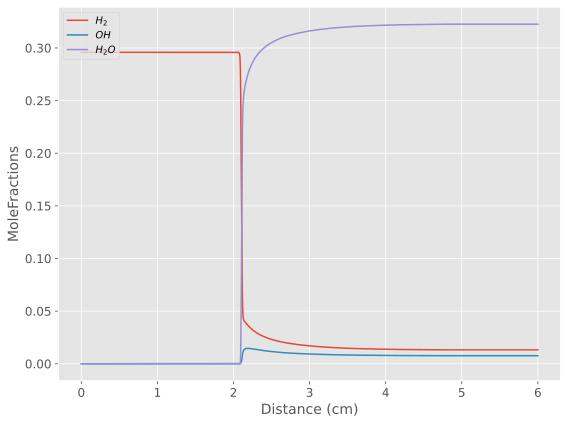

In [165]:
# Extract mole fraction data
X_H2 = flame.X[gas.species_index('H2')] 
X_OH = flame.X[gas.species_index('OH')]
X_H2O = flame.X[gas.species_index('H2O')]

plt.figure()

plt.plot(flame.grid * 100, X_H2, "-", label="$H_{2}$")
plt.plot(flame.grid * 100, X_OH, "-", label="$OH$")
plt.plot(flame.grid * 100, X_H2O, "-", label="$H_{2}O$")

plt.legend(loc=2)
plt.xlabel("Distance (cm)")
plt.ylabel("MoleFractions");

Text(0, 0.5, 'U m/s')

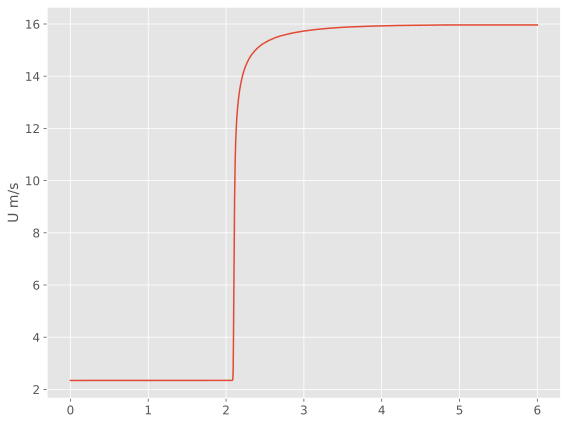

In [166]:
plt.plot(flame.grid * 100,flame.velocity)
plt.ylabel('U m/s')

In [167]:
#Solve with multicomponent transport properties
flame.transport_model ='multicomponent'
flame.solve(loglevel)
#flame.show()
print(f"multicomponent flamespeed = {flame.velocity[0]:7f} m/s")
#flame.save(output, name="multi", description="solution with multicomponent transport")


..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [151] point grid(s).

..............................................................................
no new points needed in flame
multicomponent flamespeed = 2.294966 m/s


**Exercise**

a) Considering hydrogen/air freely propagating flames at ambient pressure and initial T of 300 K, 
calculate the laminar flame speed in the equivalence ratio range 0.3-3.0 with mixture-averaged transport

b) Considering hydrogen/oxygen freely propagating flames at ambient pressure, 
calculate the laminar flame speed in the equivalence ratio range 0.3-3.0 with mixture-averaged transport
